In [1]:
import pandas as pd
import numpy as np
import autosklearn.regression as autocl
from sklearn.model_selection import train_test_split
import sklearn.metrics

import sklearn.datasets
import matplotlib.pyplot as plt
from scipy import stats
import xgboost as xgb
from autosklearn.metrics import balanced_accuracy, precision, recall, f1
from sklearn import (manifold, datasets, preprocessing, model_selection, decomposition, metrics, multioutput)
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing

In [2]:
# select user input
user_input = int(input("Which user's result do you want to look at?: "))

# read the dataframe
data = pd.read_csv('data.csv').astype(float)
#hierarchy = pd.read_csv('food_hierarchy.csv')
#relations = pd.read_csv('food_symptom_relationship_strength.csv')


df = data[data['user_number'] == user_input]

# drop all Null data (filtering null values)
df.dropna()


# split the dataset into training and test data
X = df.iloc[:,:-2].values
y = df["symptom_value"].values

Which user's result do you want to look at?: 7


In [3]:
n_samples = X.shape[0]
n_train = int(n_samples * 0.8)
indices = np.arange(n_samples)
np.random.shuffle(indices)

In [4]:
def preprocessing(X):
    from sklearn.preprocessing import StandardScaler
    import sklearn.preprocessing
    std_scaler = StandardScaler()
    X = std_scaler.fit_transform(X)
    X = sklearn.preprocessing.normalize(X, norm='l2')
    return X
X = preprocessing(X)

In [5]:
# split the dataset into training and test data
train_indices = indices[:n_train]
test_indices = indices[n_train:]

X_train = X[train_indices]
y_train = y[train_indices]

X_test = X[test_indices]
y_test = y[test_indices]

In [8]:
# train the module
automl = autocl.AutoSklearnRegressor(
    time_left_for_this_task = 120,
    per_run_time_limit = 30,
    disable_evaluator_output = False,
    resampling_strategy = "cv",
    resampling_strategy_arguments = {"folds": 10},
)
automl.fit(X_train, y_train, dataset_name='IBS')
print("Before re-fit")
predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, predictions))
print("#" * 80)
print("After re-fit")
automl.refit(X_train.copy(), y_train.copy())
# pickle.dump(automl, open('model.sav', 'wb'))
predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, predictions))
print("#" * 80)

# automl.fit(X_train, y_train)

[WARNING] [2023-04-16 22:34:04,035:Client-TAE] Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 1.0 for quality scenarios. (Change value through "cost_for_crash"-option.)
[WARNING] [2023-04-16 22:34:08,197:Client-TAE] Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 1.0 for quality scenarios. (Change value through "cost_for_crash"-option.)
[WARNING] [2023-04-16 22:34:13,913:Client-TAE] Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 1.0 for quality scenarios. (Change value through "cost_for_crash"-option.)
[WARNING] [2023-04-16 22:34:19,590:Client-TAE] Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 1.0 for quality scenarios. (Change value through "cost_for_crash"-option.)
[WARNING] [2023-04-16 22:34:25,679:Client-TAE] Target Algorithm returned NaN or inf as quality. Algorithm ru

In [9]:
# print the results
print(automl.leaderboard())

          rank  ensemble_weight              type  cost  duration
model_id                                                         
3            1             0.82  gaussian_process   1.0  4.092639
14           2             0.18     liblinear_svr   1.0  3.529416


In [10]:
# print the accuracy
predictions = automl.predict(X_test)

In [11]:
print("Test R2 score:", sklearn.metrics.r2_score(y_test, predictions))

Test R2 score: -13.67278858198264


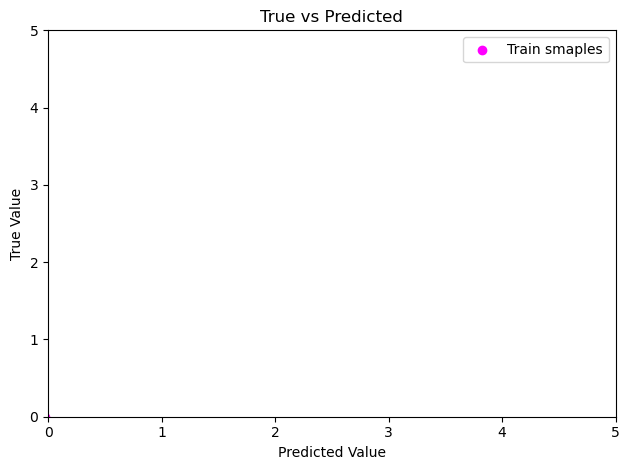

In [12]:
plt.scatter(predictions,y_test,label="Train smaples",c="magenta")
plt.title('True vs Predicted')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.legend()
plt.xlim([0,5])
plt.ylim([0,5])
plt.tight_layout()
plt.show()
